In [1]:
## Part1:

In [1]:
import sklearn
import pandas as pd
import numpy as np


In [3]:
C = pd.read_csv('/home/kentaro/Dropbox/covariates.csv')

In [4]:
C

,Index,Gender,Age,marrital,APACHE II first 24,Hx CVA (including TIA),Hx HTN,Hx Sz /epilepsy,Hx brain surgery,Hx CKD,...,iGCS-Total,iGCS = T?,iGCS-E,iGCS-V,iGCS-M,Worst GCS in 1st 24,Worst GCS Intubation status,iGCS actual scores,neuro_dx_Seizures/status epilepticus,prim_dx_Respiratory disorders
0,sid1,0,19.93,0.0,NaN,0.0,0.0,0.0,0.0,0.0,...,11,0,4,1,6,11,0,11,0,0
1,sid2,0,85.01,0.0,NaN,0.0,1.0,0.0,0.0,1.0,...,7,0,1,2,4,3,1,3,0,1
2,sid3,1,45.91,1.0,NaN,0.0,0.0,1.0,0.0,0.0,...,8,0,3,1,4,8,0,8,0,1
3,sid4,1,53.99,1.0,NaN,0.0,0.0,0.0,1.0,0.0,...,4,0,1,2,1,3,1,4,0,1
4,sid5,1,23.08,0.0,NaN,0.0,0.0,1.0,0.0,0.0,...,6,1,1,1,4,3,1,6,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,sid1996,1,80.20,1.0,NaN,0.0,1.0,0.0,0.0,0.0,...,5,1,1,1,3,3,1,5,1,0
1995,sid1997,1,60.44,0.0,NaN,0.0,0.0,1.0,0.0,0.0,...,3,1,1,1,1,3,1,3,1,0
1996,sid1998,1,28.75,1.0,NaN,0.0,0.0,0.0,0.0,0.0,...,13,0,4,3,6,13,0,13,0,0
1997,sid1999,1,50.08,0.0,NaN,0.0,0.0,1.0,1.0,0.0,...,12,0,2,4,6,12,0,12,1,0


In [5]:
#APACHE has a lot of missing parameters so we will remove it from the dataframe
C = C.drop(['APACHE II  first 24'], axis=1)


In [6]:
C.columns

Index(['Index', 'Gender', 'Age', 'marrital', 'Hx CVA (including TIA)',
       'Hx HTN', 'Hx Sz /epilepsy', 'Hx brain surgery', 'Hx CKD', 'Hx CAD/MI',
       'Hx CHF', 'Hx DM', 'Hx of HLD', 'Hx tobacco (including ex-smokers)',
       'Hx ETOH abuse any time in their life (just when in the hx is mentioned)',
       'Hx other substance abuse, any time in their life',
       'Hx cancer (other than CNS cancer)', 'Hx CNS cancer', 'Hx COPD/ Asthma',
       'premorbid MRS before admission  (modified ranking scale),before admission',
       'SZ at presentation,(exclude non-convulsive seizures) just if it is mentioned in MGH notes (the date is necessary, however,the date is the day of admission at MGH)',
       'hydrocephalus  (either on admission or during hospital course)   QPID',
       'iMV  (initial (on admission) mechanical ventilation)', 'systolic BP',
       'diastolic BP', 'Midline shift with any reason ( Document Date)',
       'Primary systemic dx Sepsis/Shock', 'iGCS-Total', 'iGCS = 

In [7]:
#normalize the numericals
C1 = C
C1['Age'] = (C['Age'] - np.mean(C['Age']))/np.std(C['Age'])
C1['systolic BP'] = (C['systolic BP'] - np.mean(C['systolic BP']))/np.std(C['systolic BP'])
C1['diastolic BP'] = (C['diastolic BP'] - np.mean(C['diastolic BP']))/np.std(C['diastolic BP'])

# convert ordinal to i-1/2 / M where is ordinal rank and M is total rank. For GCS, M  = 15, For MRS M = 6
#C1.iloc[:,27:34] = (C1.iloc[:,27:34]  - 0.5)/15 
C1.iloc[:,27:34] = (C1.iloc[:,27:34]  - np.mean(C1.iloc[:,27:34]))/np.std(C1.iloc[:,27:34]) 
C1['iGCS actual scores'] = (C1['iGCS actual scores']  - np.mean(C1['iGCS actual scores']))/np.std(C1['iGCS actual scores']) 
#C1['iGCS actual scores'] = (C1['iGCS actual scores']  - 0.5)/15 

C1['premorbid MRS before admission  (modified ranking scale),before admission'] = (C1['premorbid MRS before admission  (modified ranking scale),before admission'] - 0.5)/6

C1

,Index,Gender,Age,marrital,Hx CVA (including TIA),Hx HTN,Hx Sz /epilepsy,Hx brain surgery,Hx CKD,Hx CAD/MI,...,iGCS-Total,iGCS = T?,iGCS-E,iGCS-V,iGCS-M,Worst GCS in 1st 24,Worst GCS Intubation status,iGCS actual scores,neuro_dx_Seizures/status epilepticus,prim_dx_Respiratory disorders
0,sid1,0,-2.276488,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.183509,-0.801601,0.874397,-1.032425,0.770527,0.435355,-0.945932,0.184854,0,0
1,sid2,0,1.409512,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,-0.653533,-0.801601,-1.314150,-0.485718,-0.224810,-1.157095,1.057159,-1.491942,0,1
2,sid3,1,-0.805033,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.444273,-0.801601,0.144881,-1.032425,-0.224810,-0.161814,-0.945932,-0.443944,0,1
3,sid4,1,-0.347398,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-1.281315,-0.801601,-1.314150,-0.485718,-1.717816,-1.157095,1.057159,-1.282343,0,1
4,sid5,1,-2.098078,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.862794,1.247504,-1.314150,-1.032425,-0.224810,-1.157095,1.057159,-0.863144,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,sid1996,1,1.137083,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.072055,1.247504,-1.314150,-1.032425,-0.722478,-1.157095,1.057159,-1.072743,1,0
1995,sid1997,1,0.017917,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,-1.490576,1.247504,-1.314150,-1.032425,-1.717816,-1.157095,1.057159,-1.491942,1,0
1996,sid1998,1,-1.776941,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.602030,-0.801601,0.874397,0.060988,0.770527,0.833467,-0.945932,0.604054,0,0
1997,sid1999,1,-0.568853,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.392769,-0.801601,-0.584634,0.607695,0.770527,0.634411,-0.945932,0.394454,1,0


In [8]:
C1=  C.iloc[:,1:37]
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(C1)
print(scaler.transform(C1))

C1 = C1 - np.mean(C1) 

[[-1.03513409 -2.27648813 -0.99038682 ...  0.18485449 -0.59371995
  -0.63622216]
 [-1.03513409  1.40951212 -0.99038682 ... -1.49194248 -0.59371995
   1.57177801]
 [ 0.96605841 -0.80503321  1.00970649 ... -0.44394437 -0.59371995
   1.57177801]
 ...
 [ 0.96605841 -1.77694108  1.00970649 ...  0.60405374 -0.59371995
  -0.63622216]
 [ 0.96605841 -0.5688528  -0.99038682 ...  0.39445412  1.68429576
  -0.63622216]
 [-1.03513409 -0.37854916  1.00970649 ...  0.39445412 -0.59371995
  -0.63622216]]


In [9]:
#Fill in NAN with most frequent (chosen to avoid binary being repalced with mean)
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp.fit(C1)
C1 = imp.transform(C1)

C1
#C1 = imp.transform(C.loc[:,C.columns != 'Index'])




array([[-0.51725863, -2.27648813, -0.49517031, ...,  0.18485449,
        -0.26063032, -0.28814407],
       [-0.51725863,  1.40951212, -0.49517031, ..., -1.49194248,
        -0.26063032,  0.71185593],
       [ 0.48274137, -0.80503321,  0.50482969, ..., -0.44394437,
        -0.26063032,  0.71185593],
       ...,
       [ 0.48274137, -1.77694108,  0.50482969, ...,  0.60405374,
        -0.26063032, -0.28814407],
       [ 0.48274137, -0.5688528 , -0.49517031, ...,  0.39445412,
         0.73936968, -0.28814407],
       [-0.51725863, -0.37854916,  0.50482969, ...,  0.39445412,
        -0.26063032, -0.28814407]])

In [10]:
df = pd.DataFrame(data = C1, index = C.index, columns= C.columns[1:])

df

,Gender,Age,marrital,Hx CVA (including TIA),Hx HTN,Hx Sz /epilepsy,Hx brain surgery,Hx CKD,Hx CAD/MI,Hx CHF,...,iGCS-Total,iGCS = T?,iGCS-E,iGCS-V,iGCS-M,Worst GCS in 1st 24,Worst GCS Intubation status,iGCS actual scores,neuro_dx_Seizures/status epilepticus,prim_dx_Respiratory disorders
0,-0.517259,-2.276488,-0.49517,-0.195368,-0.530211,-0.185801,-0.100705,-0.135448,-0.187815,-0.1143,...,0.183509,-0.801601,0.874397,-1.032425,0.770527,0.435355,-0.945932,0.184854,-0.26063,-0.288144
1,-0.517259,1.409512,-0.49517,-0.195368,0.469789,-0.185801,-0.100705,0.864552,-0.187815,-0.1143,...,-0.653533,-0.801601,-1.314150,-0.485718,-0.224810,-1.157095,1.057159,-1.491942,-0.26063,0.711856
2,0.482741,-0.805033,0.50483,-0.195368,-0.530211,0.814199,-0.100705,-0.135448,-0.187815,-0.1143,...,-0.444273,-0.801601,0.144881,-1.032425,-0.224810,-0.161814,-0.945932,-0.443944,-0.26063,0.711856
3,0.482741,-0.347398,0.50483,-0.195368,-0.530211,-0.185801,0.899295,-0.135448,-0.187815,-0.1143,...,-1.281315,-0.801601,-1.314150,-0.485718,-1.717816,-1.157095,1.057159,-1.282343,-0.26063,0.711856
4,0.482741,-2.098078,-0.49517,-0.195368,-0.530211,0.814199,-0.100705,-0.135448,-0.187815,-0.1143,...,-0.862794,1.247504,-1.314150,-1.032425,-0.224810,-1.157095,1.057159,-0.863144,0.73937,-0.288144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.482741,1.137083,0.50483,-0.195368,0.469789,-0.185801,-0.100705,-0.135448,-0.187815,-0.1143,...,-1.072055,1.247504,-1.314150,-1.032425,-0.722478,-1.157095,1.057159,-1.072743,0.73937,-0.288144
1995,0.482741,0.017917,-0.49517,-0.195368,-0.530211,0.814199,-0.100705,-0.135448,-0.187815,-0.1143,...,-1.490576,1.247504,-1.314150,-1.032425,-1.717816,-1.157095,1.057159,-1.491942,0.73937,-0.288144
1996,0.482741,-1.776941,0.50483,-0.195368,-0.530211,-0.185801,-0.100705,-0.135448,-0.187815,-0.1143,...,0.602030,-0.801601,0.874397,0.060988,0.770527,0.833467,-0.945932,0.604054,-0.26063,-0.288144
1997,0.482741,-0.568853,-0.49517,-0.195368,-0.530211,0.814199,0.899295,-0.135448,-0.187815,-0.1143,...,0.392769,-0.801601,-0.584634,0.607695,0.770527,0.634411,-0.945932,0.394454,0.73937,-0.288144


In [11]:
C2 = df.to_numpy()

In [12]:
df.columns

Index(['Gender', 'Age', 'marrital', 'Hx CVA (including TIA)', 'Hx HTN',
       'Hx Sz /epilepsy', 'Hx brain surgery', 'Hx CKD', 'Hx CAD/MI', 'Hx CHF',
       'Hx DM', 'Hx of HLD', 'Hx tobacco (including ex-smokers)',
       'Hx ETOH abuse any time in their life (just when in the hx is mentioned)',
       'Hx other substance abuse, any time in their life',
       'Hx cancer (other than CNS cancer)', 'Hx CNS cancer', 'Hx COPD/ Asthma',
       'premorbid MRS before admission  (modified ranking scale),before admission',
       'SZ at presentation,(exclude non-convulsive seizures) just if it is mentioned in MGH notes (the date is necessary, however,the date is the day of admission at MGH)',
       'hydrocephalus  (either on admission or during hospital course)   QPID',
       'iMV  (initial (on admission) mechanical ventilation)', 'systolic BP',
       'diastolic BP', 'Midline shift with any reason ( Document Date)',
       'Primary systemic dx Sepsis/Shock', 'iGCS-Total', 'iGCS = T?', 'iGC

In [14]:
#only use GCS Total
df.drop(['iGCS-Total', 'iGCS = T?', 'iGCS-E', 'iGCS-V', 'iGCS-M' ], axis = 1)



,Gender,Age,marrital,Hx CVA (including TIA),Hx HTN,Hx Sz /epilepsy,Hx brain surgery,Hx CKD,Hx CAD/MI,Hx CHF,...,iMV (initial (on admission) mechanical ventilation),systolic BP,diastolic BP,Midline shift with any reason ( Document Date),Primary systemic dx Sepsis/Shock,Worst GCS in 1st 24,Worst GCS Intubation status,iGCS actual scores,neuro_dx_Seizures/status epilepticus,prim_dx_Respiratory disorders
0,-0.517259,-2.276488,-0.49517,-0.195368,-0.530211,-0.185801,-0.100705,-0.135448,-0.187815,-0.1143,...,-0.428214,-1.312606,-1.062215,-0.230115,-0.15958,0.435355,-0.945932,0.184854,-0.26063,-0.288144
1,-0.517259,1.409512,-0.49517,-0.195368,0.469789,-0.185801,-0.100705,0.864552,-0.187815,-0.1143,...,-0.428214,0.395203,-0.218003,0.769885,-0.15958,-1.157095,1.057159,-1.491942,-0.26063,0.711856
2,0.482741,-0.805033,0.50483,-0.195368,-0.530211,0.814199,-0.100705,-0.135448,-0.187815,-0.1143,...,0.571786,-0.153735,0.678972,-0.230115,-0.15958,-0.161814,-0.945932,-0.443944,-0.26063,0.711856
3,0.482741,-0.347398,0.50483,-0.195368,-0.530211,-0.185801,0.899295,-0.135448,-0.187815,-0.1143,...,-0.428214,-0.641681,-0.112477,0.769885,-0.15958,-1.157095,1.057159,-1.282343,-0.26063,0.711856
4,0.482741,-2.098078,-0.49517,-0.195368,-0.530211,0.814199,-0.100705,-0.135448,-0.187815,-0.1143,...,0.571786,-0.489198,0.784499,-0.230115,-0.15958,-1.157095,1.057159,-0.863144,0.73937,-0.288144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.482741,1.137083,0.50483,-0.195368,0.469789,-0.185801,-0.100705,-0.135448,-0.187815,-0.1143,...,0.571786,0.364707,0.415156,-0.230115,-0.15958,-1.157095,1.057159,-1.072743,0.73937,-0.288144
1995,0.482741,0.017917,-0.49517,-0.195368,-0.530211,0.814199,-0.100705,-0.135448,-0.187815,-0.1143,...,0.571786,-1.465089,-1.009452,-0.230115,0.84042,-1.157095,1.057159,-1.491942,0.73937,-0.288144
1996,0.482741,-1.776941,0.50483,-0.195368,-0.530211,-0.185801,-0.100705,-0.135448,-0.187815,-0.1143,...,-0.428214,-0.702674,-0.429056,-0.230115,-0.15958,0.833467,-0.945932,0.604054,-0.26063,-0.288144
1997,0.482741,-0.568853,-0.49517,-0.195368,-0.530211,0.814199,0.899295,-0.135448,-0.187815,-0.1143,...,-0.428214,-0.672177,-0.376293,-0.230115,-0.15958,0.634411,-0.945932,0.394454,0.73937,-0.288144


In [12]:
#remove APACHEII

#options:
#only use GCS total 
#worst GCS in 24
#combine diasotic and systolic BP (2*dias + Sys)/3



NameError: name 'plt' is not defined

<Figure size 6400x4800 with 0 Axes>

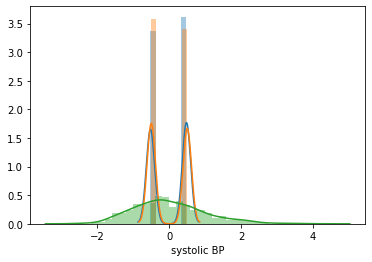

In [15]:
import seaborn as sns

sns.distplot(df['Gender'])

sns.distplot(df['marrital'])

sns.distplot(df['systolic BP'])

In [16]:
df.iloc[:,22]

0      -1.312606
1       0.395203
2      -0.153735
3      -0.641681
4      -0.489198
          ...   
1994    0.364707
1995   -1.465089
1996   -0.702674
1997   -0.672177
1998   -0.214728
Name: systolic BP, Length: 1999, dtype: float64

Index(['marrital', 'Hx CVA (including TIA)', 'Hx HTN', 'Hx Sz /epilepsy',
       'Hx brain surgery', 'Hx CKD', 'Hx CAD/MI', 'Hx CHF', 'Hx DM',
       'Hx of HLD', 'Hx tobacco (including ex-smokers)',
       'Hx ETOH abuse any time in their life (just when in the hx is mentioned)',
       'Hx other substance abuse, any time in their life',
       'Hx cancer (other than CNS cancer)', 'Hx CNS cancer',
       'Hx COPD/ Asthma'],
      dtype='object')
(1999, 2)


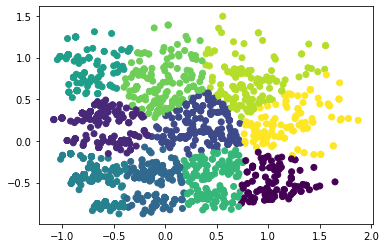

In [27]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt

pca = PCA(n_components = 2)
X = df.iloc[:,range(2,18)]
#X = df.iloc[:,range(0,33)]
#X = df.iloc[:,[1,22,23,26,31]]
print(X.columns)
projected = pca.fit_transform(X)


print(projected.shape)


kmeans = KMeans(n_clusters=10)
kmeans.fit(projected)
y_kmeans = kmeans.predict(projected)


plt.scatter(projected[:, 0], projected[:, 1], c = y_kmeans)

In [28]:
from sklearn.manifold import MDS

from sklearn.metrics import pairwise_distances

X = df.iloc[:,range(0,33)]
dist = pairwise_distances(X, metric = 'hamming')




embedding = MDS(n_components=5, dissimilarity='precomputed')
embedding.fit(dist)
y_kmeans = kmeans.predict(projected)
X_transformed = embedding.fit_transform(dist)
X_transformed.shape

(1999, 5)

In [ ]:
plt.scatter(X_transformed[:, 0], X_transformed[:, 1])

[0.43653431 0.13000908 0.08253283 0.03265626 0.02500387 0.02180458
 0.0210209  0.020619   0.01935648 0.01773502 0.01630714 0.01512937
 0.01348304 0.01269692 0.01208652 0.01162074 0.01054602 0.00999327
 0.00970885 0.00940501 0.00903177 0.00870715 0.00781173 0.00765863
 0.00660748 0.00628748 0.00607657 0.00520344 0.00449528 0.00378779
 0.00305065 0.00243538 0.00059744]


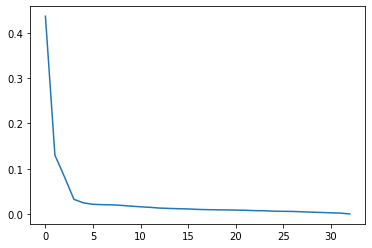

In [21]:
import seaborn as sns
pca = PCA(n_components=33)
pca.fit(df.iloc[:,range(0,33)])

print(pca.explained_variance_ratio_)




sns.lineplot(data=pca.explained_variance_ratio_)

In [22]:
cont = [1,22,23,26,27,28,29,30,31,33]

disc = np.setdiff1d(range(0,36), cont)
print(cont)
print(disc)

[1, 22, 23, 26, 27, 28, 29, 30, 31, 33]
[ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 24 25 32
 34 35]


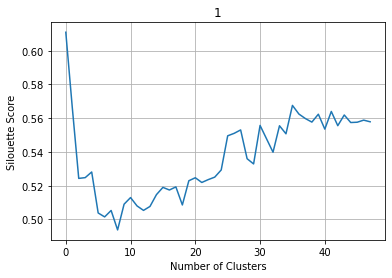

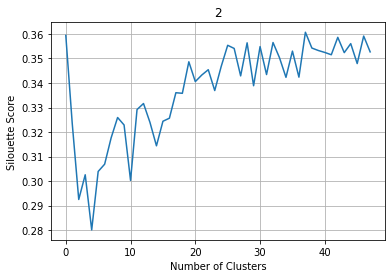

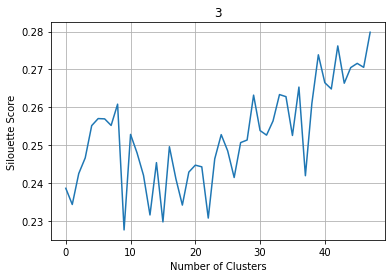

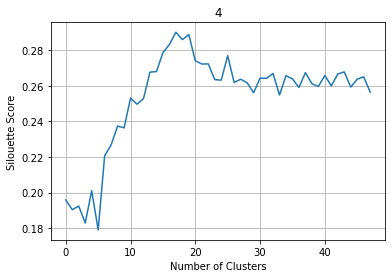

In [23]:
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

for j in range(1,5):
    sil_list = []
    for i in range(2, 50):
        pca = PCA(n_components = j)
        #X = df.iloc[:,range(0,36)]
        X = pca.fit_transform(df.iloc[:,range(2,22)])
        
        
        #X = pca.fit_transform(df.iloc[:,range(0,36)])
        
        #X = pca.fit_transform(df.iloc[:,disc])

        #clustering = KMeans(n_clusters=i).fit( X)


        #clustering = AgglomerativeClustering().fit(C.loc[:,C.columns != 'Index'])
        clustering = AgglomerativeClustering(n_clusters=i,affinity='euclidean').fit(X)
        sil_list.append(silhouette_score(X, clustering.labels_))


    # Data for plotting


    fig, ax = plt.subplots()
    ax.plot(sil_list)

    ax.set(xlabel='Number of Clusters', ylabel='Silouette Score',
           title=str(j))
    ax.grid()

    plt.show()

In [42]:
from collections import Counter

pca = PCA(n_components = 4)
X = pca.fit_transform(df.iloc[:,range(0,36)])
clustering = KMeans(n_clusters=12).fit( X)
Counter(clustering.labels_)

Counter({4: 190,
         1: 180,
         10: 100,
         8: 157,
         11: 129,
         5: 338,
         9: 102,
         6: 169,
         3: 93,
         7: 242,
         0: 183,
         2: 116})

In [43]:
C['Index']

0          sid1
1          sid2
2          sid3
3          sid4
4          sid5
         ...   
1994    sid1996
1995    sid1997
1996    sid1998
1997    sid1999
1998    sid2000
Name: Index, Length: 1999, dtype: object

numpy.ndarray

In [45]:
C['12_Cluster'] = clustering.labels_

In [46]:
C2 = C[['Index', '12_Cluster']]

In [47]:
C2.to_csv('2000_cluster_12.csv', index=False )

In [48]:
C2

,Index,12_Cluster
0,sid1,4
1,sid2,1
2,sid3,10
3,sid4,8
4,sid5,11
...,...,...
1994,sid1996,6
1995,sid1997,8
1996,sid1998,4
1997,sid1999,4
